# Task 4

## Import the necessary libraries

In [1]:
import numpy as np
from keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
from random import random
from VAE_Classes import *

2022-12-08 14:41:50.699493: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load the FireEvac dataset and rescale to a range of [-1, 1]

In [2]:
# Load the data
fire_evac_train = np.load("FireEvac_train_set.npy")
fire_evac_test = np.load("FireEvac_test_set.npy")

In [3]:
# Rescale
max_val = fire_evac_train.max()
fire_evac_train = 2*fire_evac_train/max_val - 1
fire_evac_test = 2*fire_evac_test/max_val - 1

## Visualize the training and test set

In [4]:
def make_scatter_plot(dataset, title):
    """ Function to plot the training and data set.

    Args:
        dataset: numpy.ndarray
        title: str
          
    """
    dim_1_values = [i[0] for i in dataset]
    dim_2_values = [i[1] for i in dataset]
    plt.xlabel("dim-1")
    plt.ylabel("dim-2")
    plt.title(title)
    plt.scatter(dim_1_values, dim_2_values)

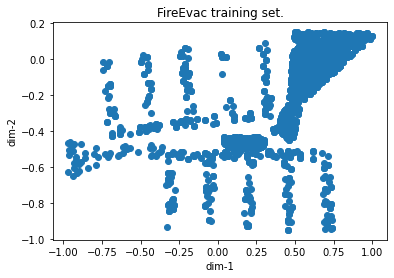

In [5]:
# Visualize training set
make_scatter_plot(fire_evac_train, title="FireEvac training set.")

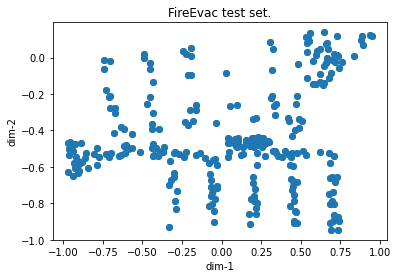

In [6]:
# Visualize test set
make_scatter_plot(fire_evac_test, title="FireEvac test set.")

## Build the encoder and decoder

In [7]:
def build_encoder(latent_space):
    """ Construct the encoder network

    Args:
        latent_space: int

    Returns: 
        keras.model
          
    """
    encoder_inputs = keras.Input(shape=(2))
    x = layers.Dense(1024, activation="relu")(encoder_inputs)
    x = layers.Dense(1024, activation="relu")(x)
    z_mean = layers.Dense(latent_space, name="z_mean")(x)
    z_log_var = layers.Dense(latent_space, name="z_log_var")(x)
    z = Sampling()([z_mean, z_log_var])
    return keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

In [8]:
def build_decoder(latent_space):
    """ Construct the decoder network.

    Args:
        latent_space: int

    Returns: 
        keras.model
          
    """
    latent_inputs = keras.Input(shape=(latent_space,))
    x = layers.Dense(1024,activation="relu")(latent_inputs)
    x = layers.Dense(1024, activation="relu")(x)
    x = layers.Dense(2)(x)
    return keras.Model(latent_inputs, x, name="decoder")   

In [9]:
encoder = build_encoder(latent_space=2)
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 1024)         3072        ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 1024)         1049600     ['dense[0][0]']                  
                                                                                                  
 z_mean (Dense)                 (None, 2)            2050        ['dense_1[0][0]']                
                                                                                            

2022-12-08 14:41:59.116607: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
decoder = build_decoder(latent_space=2)
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_2 (Dense)             (None, 1024)              3072      
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 1,054,722
Trainable params: 1,054,722
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [11]:
vae_fe = VAE(encoder, decoder, is_image=False)
vae_fe.compile(optimizer=keras.optimizers.Adam(0.001))
history3 = vae_fe.fit(fire_evac_train,epochs=100, batch_size=fire_evac_train.shape[0])

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1265.7699 - reconstruction_loss: 1265.7694 - kl_loss: 5.3585e-04
Epoch 2/100
1/1 [==============================] - 0s 277ms/step - loss: 778.2838 - reconstruction_loss: 778.2465 - kl_loss: 0.0373
Epoch 3/100
1/1 [==============================] - 1s 700ms/step - loss: 891.8868 - reconstruction_loss: 891.8035 - kl_loss: 0.0834
Epoch 4/100
1/1 [==============================] - 1s 520ms/step - loss: 769.5367 - reconstruction_loss: 769.4154 - kl_loss: 0.1213
Epoch 5/100
1/1 [==============================] - 0s 317ms/step - loss: 699.7255 - reconstruction_loss: 699.5317 - kl_loss: 0.1938
Epoch 6/100
1/1 [==============================] - 0s 269ms/step - loss: 696.0816 - reconstruction_loss: 695.7776 - kl_loss: 0.3039
Epoch 7/100
1/1 [==============================] - 0s 286ms/step - loss: 663.3499 - reconstruction_loss: 662.9011 - kl_loss: 0.4487
Epoch 8/100
1/1 [==============================] - 0s 286ms/step - loss: 

1/1 [==============================] - 0s 301ms/step - loss: 12.8474 - reconstruction_loss: 3.3258 - kl_loss: 9.5216
Epoch 64/100
1/1 [==============================] - 1s 557ms/step - loss: 12.8551 - reconstruction_loss: 3.4772 - kl_loss: 9.3779
Epoch 65/100
1/1 [==============================] - 1s 742ms/step - loss: 12.5655 - reconstruction_loss: 3.2946 - kl_loss: 9.2709
Epoch 66/100
1/1 [==============================] - 0s 499ms/step - loss: 12.0703 - reconstruction_loss: 2.8647 - kl_loss: 9.2056
Epoch 67/100
1/1 [==============================] - 0s 279ms/step - loss: 11.8821 - reconstruction_loss: 2.7380 - kl_loss: 9.1441
Epoch 68/100
1/1 [==============================] - 1s 614ms/step - loss: 11.6479 - reconstruction_loss: 2.6033 - kl_loss: 9.0446
Epoch 69/100
1/1 [==============================] - 0s 288ms/step - loss: 11.5579 - reconstruction_loss: 2.6349 - kl_loss: 8.9230
Epoch 70/100
1/1 [==============================] - 0s 281ms/step - loss: 11.2828 - reconstruction_loss

## Reconstruct and visualize the test set

In [12]:
# Reconstruct the test set
reconstructed_test_set = vae_fe.decoder(vae_fe.encoder(fire_evac_test)[2])

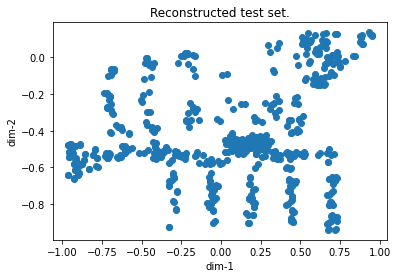

In [13]:
# Visualize the reconstructed test set
make_scatter_plot(reconstructed_test_set, title="Reconstructed test set.")

## Generate 1000 samples and visualize

In [14]:
# Generate data
fire_evac_generated_data = []
for i in range(1000):
    z_sample = np.random.normal(0, 1, (600,2))
    generated_data = vae_fe.decoder(z_sample)
    fire_evac_generated_data.append(generated_data)

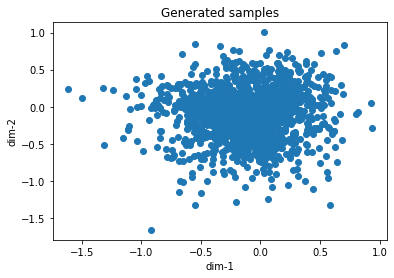

In [15]:
# Visualize the generated data
make_scatter_plot(fire_evac_generated_data, title="Generated samples")

## Plot the loss curve

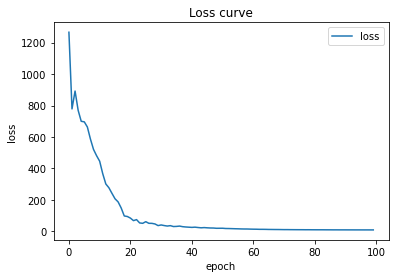

In [16]:
# Plot the loss curve
plt.plot(history3.history['loss'])
plt.title('Loss curve')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper right')
plt.show()